# ASCII Art Workshop

You can follow along with this workshop in your browser [here](https://replit.com/@hughevansdev/ASCII-Art-Workshop#main.py) or alternatively follow the steps below to install the dependencies you'll need locally:

1. [Install and activate a virtual environment](https://packaging.python.org/en/latest/guides/installing-using-pip-and-virtual-environments/)

    ```
    python3 -m venv .venv
    source .venv/bin/activate
    which python
    .venv/bin/python
    ```

2. Install requirements with pip, if you haven't cloned the repo you can use curl to download the `requirements.txt` file

    ```
    curl https://raw.githubusercontent.com/hevansDev/ascii-booth/main/Workshop/requirements.txt -o requirements.txt
    python3 -m pip install -r requirements.txt
    ```

3. You'll also need a monospaced font, you can [download courier here](https://github.com/hevansDev/ascii-booth/raw/main/Workshop/fonts/courier.ttf)

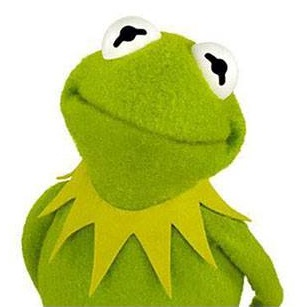

In [3]:
from PIL import Image, ImageDraw, ImageFont

# Update path to your own image, both pngs and jpgs will work
startImage = Image.open("./images/kermit.jpg")
display(startImage)

# Not using a notebook? Use the below instead to view images
# startImage.show()
# Using a repl.it? The above method won't work either! Save the file instead
# startImage.save("output.jpeg")

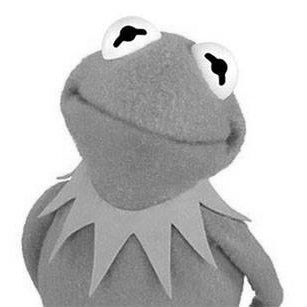

In [4]:
greyImage = startImage.convert("L")
display(greyImage)

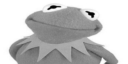

In [5]:
pixelWidth = 128  # How may characters wide the resulting image will be
pixelHeight = 64  # How many characters tall the resulting image will be

resizedImage = greyImage.resize(
    (pixelWidth, pixelHeight), resample=Image.Resampling.BILINEAR
)
display(resizedImage)

In [6]:
pixels = resizedImage.load()

# pixel = pixels[0,0]
# print(pixel)

In [7]:
characters = "Ñ@#W$9876543210?!abc;:+=-,._ "  # Taken from https://play.ertdfgcvb.xyz/


def greyscale_to_index(num):
    return int(num / 255 * (len(characters) - 1))


# # White pixel
# i = greyscale_to_index(255)
# print(i)
# print(characters[i])

# # Black pixel
# i = greyscale_to_index(0)
# print(i)
# print(characters[i])

# # Pixel
# print(pixel)
# i = greyscale_to_index(pixel)
# print(i)
# print(characters[i])

In [8]:
ascii = ""
for y in range(0, resizedImage.height):
    for x in range(0, resizedImage.width):
        pixel = pixels[x, y]
        i = greyscale_to_index(pixel)
        ascii += str(characters[i])
    ascii += "\n"
print(ascii)

                                                                                                                                
                                                                                                                                
                                               _____ _______  _                                                                 
                                              ____...,,,,..____  _                    _                                         
                                            ___.,---,-,,,,,,,.____  __ _                                                        
                                          ___.,,,,=b242!:==-,...___________________                                             
                                          __,,...-5@ÑÑÑÑ#$994-___..==-,,.._________                                             
                                     ______,,.__-0#ÑÑÑÑ@3bcbc,___.,caabbcc;:=,._____ ________    

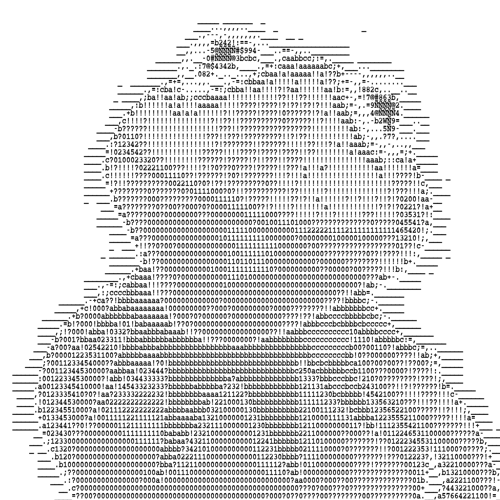

In [9]:
img = Image.new(
    "L", (13 * pixelWidth, 20 * pixelHeight), 255
)  # Blank canvas to draw art onto
draw = ImageDraw.Draw(img)
font = ImageFont.truetype("fonts/courier.ttf", 24)
draw.text((0, 0), ascii, 0, font=font)
display(img.resize((500, 500)))